# **NECESSARY IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **EXPLORING MSN02**

In [204]:
msn02 = pd.read_csv("data/msn_02_fuel_leak_signals_preprocessed.csv", sep=";")

In [205]:
# SETTING INDEX AS A DATETIME
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])
msn02 = msn02.set_index("UTC_TIME")

In [206]:
# Only Flight Phase Cruise
msn02 = msn02[msn02["FLIGHT_PHASE_COUNT"]==8.0]

# Assuming that null values in STATUS_FUEL_LEAK_DETECTED_VALID means no leak detected
msn02['STATUS_FUEL_LEAK_DETECTED_VALID'] = msn02['STATUS_FUEL_LEAK_DETECTED_VALID'].fillna(0)

In [207]:
# Dropping Duplicates
msn02 = msn02.drop_duplicates()

In [208]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383564 entries, 2011-03-09 12:44:19 to 2011-03-10 17:17:01
Data columns (total 110 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   383564 non-null  object 
 1    Flight                                383564 non-null  object 
 2    ENGINE_RUNNING_1                      383564 non-null  bool   
 3    ENGINE_RUNNING_2                      383564 non-null  bool   
 4    ENGINE_RUNNING_3                      383564 non-null  bool   
 5    ENGINE_RUNNING_4                      383564 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    383564 non-null  float64
 7    FUEL_FLOW_1                           383564 non-null  float64
 8    FUEL_FLOW_2                           383564 non-null  float64
 9    FUEL_FLOW_3                           383564 non-null  float64
 10   FUEL_FLOW_4         

In [209]:
msn02['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()

STATUS_FUEL_LEAK_DETECTED_VALID
1.0    383551
0.0        13
Name: count, dtype: int64

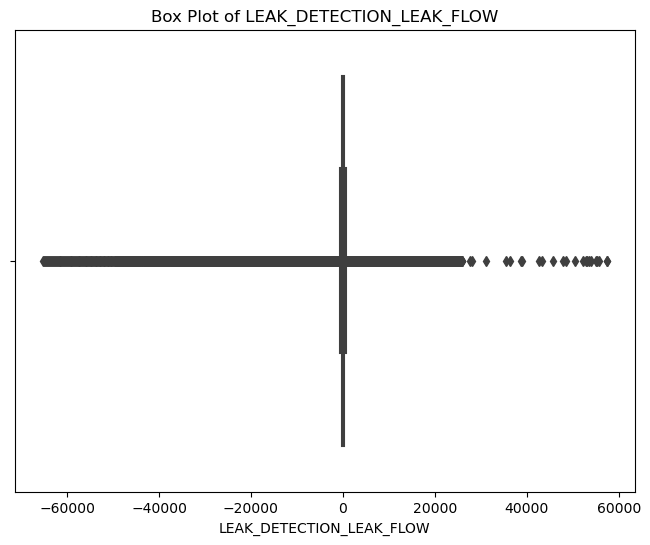

In [ ]:
plt.figure(figsize=(8,6)) 
sns.boxplot(x=msn02['LEAK_DETECTION_LEAK_FLOW'])
plt.title('Box Plot of LEAK_DETECTION_LEAK_FLOW')  
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LEAK_DETECTION_LEAK_FLOW', ylabel='Count'>

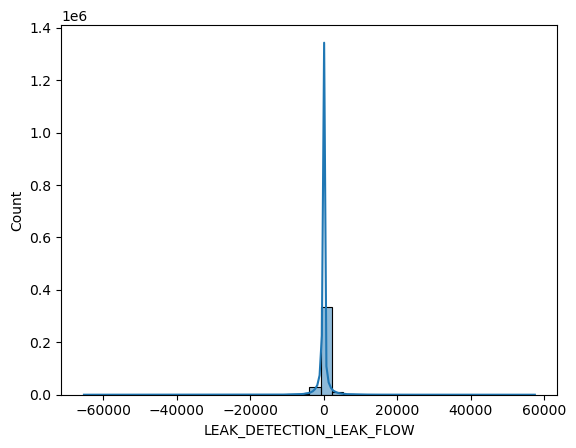

In [211]:
sns.histplot(msn02["LEAK_DETECTION_LEAK_FLOW"], bins=40, kde=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


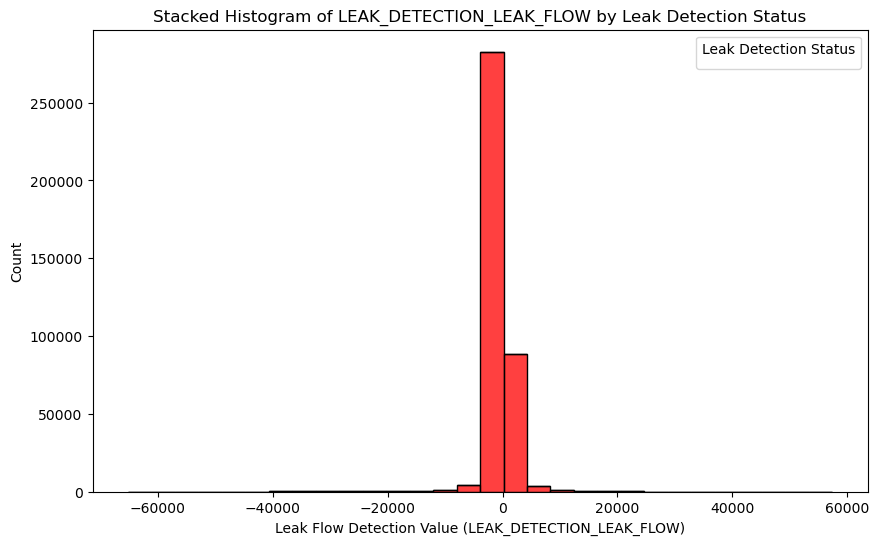

In [ ]:
# Create the stacked histogram, with color based on the binary 'STATUS_FUEL_LEAK_DETECTED_VALID'
plt.figure(figsize=(10, 6))  

sns.histplot(data=msn02, 
             x="LEAK_DETECTION_LEAK_FLOW", 
             hue="STATUS_FUEL_LEAK_DETECTED_VALID", 
             bins=30, 
             multiple="stack",  # Stack the bars for each binary value of STATUS_FUEL_LEAK_DETECTED_VALID
             palette={0: "blue", 1: "red"},  # Blue for 0, Red for 1
            )

# Set labels and title
plt.xlabel("Leak Flow Detection Value (LEAK_DETECTION_LEAK_FLOW)")
plt.ylabel("Count")
plt.title("Stacked Histogram of LEAK_DETECTION_LEAK_FLOW by Leak Detection Status")
plt.legend(title="Leak Detection Status", loc="upper right")

# Display the plot
plt.show()

# **COMBINING THE DATASETS**

In [212]:
msn10 = pd.read_csv("data/msn_10_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn11 = pd.read_csv("data/msn_11_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn12 = pd.read_csv("data/msn_12_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn14 = pd.read_csv("data/msn_14_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn29 = pd.read_csv("data/msn_29_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn37 = pd.read_csv("data/msn_37_fuel_leak_signals_preprocessed.csv", delimiter=';')
msn53 = pd.read_csv("data/msn_53_fuel_leak_signals_preprocessed.csv", delimiter=';')

In [213]:
combined = pd.concat([msn10, msn11, msn12, msn14, msn29, msn37, msn53])

In [214]:
# Only Flight Phase Cruise
combined = combined[combined["FLIGHT_PHASE_COUNT"]==8.0]

In [215]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18298257 entries, 2096 to 3033626
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   UTC_TIME            object 
 1   FUEL_USED_2         float64
 2   FUEL_USED_3         float64
 3   FUEL_USED_4         float64
 4   FW_GEO_ALTITUDE     float64
 5   VALUE_FOB           float64
 6   VALUE_FUEL_QTY_CT   float64
 7   VALUE_FUEL_QTY_FT1  float64
 8   VALUE_FUEL_QTY_FT2  float64
 9   VALUE_FUEL_QTY_FT3  float64
 10  VALUE_FUEL_QTY_FT4  float64
 11  VALUE_FUEL_QTY_LXT  float64
 12  VALUE_FUEL_QTY_RXT  float64
 13  FLIGHT_PHASE_COUNT  float64
 14  FUEL_USED_1         float64
 15  Flight              float64
 16  MSN                 object 
dtypes: float64(15), object(2)
memory usage: 2.5+ GB


In [216]:
# SETTING INDEX AS A DATETIME
combined['UTC_TIME'] = pd.to_datetime(combined['UTC_TIME'])
combined = combined.set_index("UTC_TIME")

In [217]:
combined.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18298257 entries, 2014-07-25 12:44:49 to 2018-04-22 16:29:23
Data columns (total 16 columns):
 #   Column              Non-Null Count     Dtype  
---  ------              --------------     -----  
 0   FUEL_USED_2         377742 non-null    float64
 1   FUEL_USED_3         377334 non-null    float64
 2   FUEL_USED_4         378210 non-null    float64
 3   FW_GEO_ALTITUDE     18298257 non-null  float64
 4   VALUE_FOB           18298257 non-null  float64
 5   VALUE_FUEL_QTY_CT   18298257 non-null  float64
 6   VALUE_FUEL_QTY_FT1  18298257 non-null  float64
 7   VALUE_FUEL_QTY_FT2  18298257 non-null  float64
 8   VALUE_FUEL_QTY_FT3  18298257 non-null  float64
 9   VALUE_FUEL_QTY_FT4  18298257 non-null  float64
 10  VALUE_FUEL_QTY_LXT  18298257 non-null  float64
 11  VALUE_FUEL_QTY_RXT  18298257 non-null  float64
 12  FLIGHT_PHASE_COUNT  18298257 non-null  float64
 13  FUEL_USED_1         378494 non-null    float64
 14  Flight          

In [218]:
# Dropping Duplicates
combined = combined.drop_duplicates()

In [276]:
combined.head()

,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,TOTAL_FUEL_LW,TOTAL_FUEL_RW,LW_RW_DIFF
UTC_TIME,,,,,,,,,,,,,,,,,,,
2014-07-25 12:44:49,NaN,NaN,NaN,1631.0,29270.0,12.0,1799.0,2533.0,2459.0,1825.0,10294.0,10349.0,8.0,NaN,11.0,F-RBAC,14626.0,14633.0,7.0
2014-07-25 12:44:50,NaN,NaN,NaN,1663.0,29268.0,12.0,1797.0,2529.0,2465.0,1828.0,10293.0,10345.0,8.0,NaN,11.0,F-RBAC,14619.0,14638.0,19.0
2014-07-25 12:44:51,NaN,NaN,NaN,1697.0,29272.0,11.0,1796.0,2530.0,2464.0,1835.0,10289.0,10348.0,8.0,NaN,11.0,F-RBAC,14615.0,14647.0,32.0
2014-07-25 12:44:52,NaN,NaN,NaN,1732.0,29268.0,10.0,1793.0,2525.0,2468.0,1840.0,10282.0,10351.0,8.0,NaN,11.0,F-RBAC,14600.0,14659.0,59.0
2014-07-25 12:44:53,NaN,NaN,NaN,1767.0,29272.0,10.0,1792.0,2519.0,2472.0,1846.0,10271.0,10363.0,8.0,NaN,11.0,F-RBAC,14582.0,14681.0,99.0


# **FEATURE ENGINEERING**

In [219]:
combined.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17821133 entries, 2014-07-25 12:44:49 to 2018-04-22 16:29:23
Data columns (total 16 columns):
 #   Column              Non-Null Count     Dtype  
---  ------              --------------     -----  
 0   FUEL_USED_2         377742 non-null    float64
 1   FUEL_USED_3         377333 non-null    float64
 2   FUEL_USED_4         378210 non-null    float64
 3   FW_GEO_ALTITUDE     17821133 non-null  float64
 4   VALUE_FOB           17821133 non-null  float64
 5   VALUE_FUEL_QTY_CT   17821133 non-null  float64
 6   VALUE_FUEL_QTY_FT1  17821133 non-null  float64
 7   VALUE_FUEL_QTY_FT2  17821133 non-null  float64
 8   VALUE_FUEL_QTY_FT3  17821133 non-null  float64
 9   VALUE_FUEL_QTY_FT4  17821133 non-null  float64
 10  VALUE_FUEL_QTY_LXT  17821133 non-null  float64
 11  VALUE_FUEL_QTY_RXT  17821133 non-null  float64
 12  FLIGHT_PHASE_COUNT  17821133 non-null  float64
 13  FUEL_USED_1         378494 non-null    float64
 14  Flight          

**THINGS TO CONSIDER**

| **Column Name** | **Description** |
| ----------- | ----------- |
| `VALUE_FOB` | Fuel on Board |
| `VALUE_FUEL_QTY_CT` | Central Tank |
| `VALUE_FUEL_QTY_FT1` | Fuel Quantity Feed Tank 1 (Engine 1) |
| `VALUE_FUEL_QTY_FT2` | Fuel Quantity Feed Tank 2 (Engine 2) |
| `VALUE_FUEL_QTY_FT3` | Fuel Quantity Feed Tank 3 (Engine 3) |
| `VALUE_FUEL_QTY_FT4` | Fuel Quantity Feed Tank 1 (Engine 4) |
| `VALUE_FUEL_QTY_LXT` | Fuel Quantity Transfer Tank Left |
| `VALUE_FUEL_QTY_RXT` | Fuel Quantity Transfer Tank Right |
| `FUEL_USED_1` | Fuel Used (Engine 1) |
| `FUEL_USED_2` | Fuel Used (Engine 2) |
| `FUEL_USED_3` | Fuel Used (Engine 3) |
| `FUEL_USED_4` | Fuel Used (Engine 4) |

Based on typical Airbus engining, we can thus assume the following:

| **Column Name** | **Left vs Right Side**|
| ----------- | ----------- |
| `VALUE_FUEL_QTY_LXT` | Left Outer fuel Quantity |
| `VALUE_FUEL_QTY_FT1` | Left Inner Fuel Quanitity  |
| `VALUE_FUEL_QTY_FT2` | Left Inner Fuel Quantity |
| `VALUE_FUEL_QTY_RXT` | Right Outer Fuel Quantity |
| `VALUE_FUEL_QTY_FT3` | Right Inner Fuel Quantity |
| `VALUE_FUEL_QTY_FT4` | Right Inner Fuel Quantity |

Additionally, from our research:
- Fuel can be transfered from the outertanks to the inner tanks
- This transfer happens when the inner tanks meet a certain threshold of fuel quantity, triggering the transfer from outer to inner tanks
- Fuel can be transfer from the heavier side to the lighter side to maintain balance
- Pilot and crew can detect a fuel leak when:
    1. Fuel at any point is significantly less than the predicted quantity at that time
    2. Fuel flow indiciations are significantly hgher on one engine in comparison to the other
    3. There is a significant differece between the fuel quantities between tanks in the left and right wing
    4. There is a fuel imbalance of a certain threshold or more in a specific time periond (ie. 230kg or more difference within 30 minutes.)


## **CHECKING FUEL USAGE**

First, we will try to check the actual amount of the fuel onboard in comparision to what is expected to be on board.

In [220]:
# Filter for non null fuel used data
combined_noNulls = combined[combined["FUEL_USED_2"].notnull()]

# Because FUEL_USED_2 has the most amount of nulls

In [221]:
combined_noNulls.head()

,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN
UTC_TIME,,,,,,,,,,,,,,,,
2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,1920.0,10939.0,10967.0,8.0,2445.828857,988.0,F-RBAD
2016-10-29 08:30:11,79.641632,73.209457,71.272255,1785.0,24325.0,0.0,1818.0,2506.0,2438.0,1753.0,7898.0,7914.0,8.0,78.436935,1772.0,F-RBAD
2016-10-29 08:30:12,79.764977,73.332397,71.396461,1840.0,24325.0,0.0,1819.0,2505.0,2439.0,1752.0,7897.0,7915.0,8.0,78.558754,1772.0,F-RBAD
2016-10-29 08:30:13,79.862244,73.441658,71.505798,1890.0,24311.0,0.0,1821.0,2508.0,2436.0,1751.0,7896.0,7912.0,8.0,78.666725,1772.0,F-RBAD
2016-10-29 08:30:14,79.986839,73.550957,71.629326,1935.0,24294.0,0.0,1821.0,2510.0,2432.0,1750.0,7892.0,7900.0,8.0,78.788261,1772.0,F-RBAD


In [222]:
# Define function to check fuel balance in aircraft
def check_fuel_balance(df, dataset_name):
    """
    This function calculates and checks whether fuel balance is maintained across different components:
    - Fuel Used by Engines
    - Fuel On Board (FOB)
    - Fuel Quantities Across Tanks
    """

    # Ensure all required columns exist in dataset
    required_columns = [
        'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
        'VALUE_FOB', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2',
        'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT'
    ]

    # df[required_columns] = df[required_columns].fillna(0)       # shouldn't we take out the nulls?

    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"Missing columns in {dataset_name}: {missing_columns}")
        return None

    # Calculate total fuel used across all engines
    df['TOTAL_FUEL_USED'] = df['FUEL_USED_1'] + df['FUEL_USED_2'] + df['FUEL_USED_3'] + df['FUEL_USED_4']

    # Calculate total fuel quantity across all tanks
    df['TOTAL_FUEL_QUANTITY'] = (
        df['VALUE_FUEL_QTY_CT'] + df['VALUE_FUEL_QTY_FT1'] + df['VALUE_FUEL_QTY_FT2'] +
        df['VALUE_FUEL_QTY_FT3'] + df['VALUE_FUEL_QTY_FT4'] + df['VALUE_FUEL_QTY_LXT'] + df['VALUE_FUEL_QTY_RXT']
    )

    # Checking balance assumption: Fuel On Board (FOB) vs Fuel Used + Fuel Remaining in Tanks
    df['FUEL_BALANCE_DIFF'] = df['VALUE_FOB'] - (df['TOTAL_FUEL_USED'] + df['TOTAL_FUEL_QUANTITY'])

    # Summary statistics to check fuel balance trend
    balance_stats = df['FUEL_BALANCE_DIFF'].describe()

    print(f"\n--- Fuel Balance Analysis for {dataset_name} ---")
    print(balance_stats)

    # Checking how many instances have significant imbalance
    imbalance_threshold = df['FUEL_BALANCE_DIFF'].std() * 2  # Assuming 2 standard deviations as a limit
    imbalance_count = (df['FUEL_BALANCE_DIFF'].abs() > imbalance_threshold).sum()
    print(f"Instances with significant imbalance (> 2 std dev): {imbalance_count}/{len(df)}, {imbalance_count/len(df)*100}%")

    return df[['VALUE_FOB', 'TOTAL_FUEL_USED', 'TOTAL_FUEL_QUANTITY', 'FUEL_BALANCE_DIFF']].head(10)

In [223]:
# Run fuel balance checkS on MSN 10 and MSN 12 datasets
msn_02_balance = check_fuel_balance(msn02, "MSN 02")
combined_balance = check_fuel_balance(combined_noNulls, "Combined")


--- Fuel Balance Analysis for MSN 02 ---
count    383564.000000
mean      -8494.241032
std        5197.304095
min      -22477.552000
25%      -12118.022750
50%       -7621.407500
75%       -4209.901925
max        -332.657980
Name: FUEL_BALANCE_DIFF, dtype: float64
Instances with significant imbalance (> 2 std dev): 126781/383564, 33.053414814737565%

--- Fuel Balance Analysis for Combined ---
count    376554.000000
mean      -7821.586062
std        6800.636415
min      -35655.068359
25%      -11300.618408
50%       -5710.764648
75%       -2601.814850
max        -158.141804
Name: FUEL_BALANCE_DIFF, dtype: float64
Instances with significant imbalance (> 2 std dev): 67764/377742, 17.93922836221548%


/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/3365434848.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_FUEL_USED'] = df['FUEL_USED_1'] + df['FUEL_USED_2'] + df['FUEL_USED_3'] + df['FUEL_USED_4']
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/3365434848.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_FUEL_QUANTITY'] = (
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/3365434848.py:35: SettingWithCopyWarning: 
A value is try

### **ANOTHER VERSION**

In [224]:
# Start amount of fuel on board
combined_noNulls['START_FOB'] = combined_noNulls.groupby('Flight')['VALUE_FOB'].transform('first')

# Find the total amount of fuel used
combined_noNulls['TOTAL_FUEL_USED'] = combined_noNulls['FUEL_USED_1'] + combined_noNulls['FUEL_USED_2'] + combined_noNulls['FUEL_USED_3'] + combined_noNulls['FUEL_USED_4']

# Find expected amount of fuel on board (Starting amount of fuel - total fuel used)
combined_noNulls['EXPECTED_FOB'] = combined_noNulls['START_FOB'] - combined_noNulls['TOTAL_FUEL_USED']

# Finding the discrepancy of what is on board and what is expected to be on board
combined_noNulls["FOB_DIFFERENCE"] = (combined_noNulls['VALUE_FOB'] - combined_noNulls['EXPECTED_FOB']).abs()

/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/3709862719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_noNulls['START_FOB'] = combined_noNulls.groupby('Flight')['VALUE_FOB'].transform('first')
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/3709862719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_noNulls['TOTAL_FUEL_USED'] = combined_noNulls['FUEL_USED_1'] + combined_noNulls['FUEL_USED_2'] + combined_noNulls['FUEL_USED_3'] + combined_noNulls[

In [225]:
combined_noNulls.head()

,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,...,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN,TOTAL_FUEL_USED,TOTAL_FUEL_QUANTITY,FUEL_BALANCE_DIFF,START_FOB,EXPECTED_FOB,FOB_DIFFERENCE
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2015-07-21 03:51:31,2454.501465,2444.412842,2481.687988,336.0,30967.0,0.0,1918.0,2620.0,2604.0,1920.0,...,8.0,2445.828857,988.0,F-RBAD,9826.431152,30968.0,-9827.431152,30967.0,21140.568848,9826.431152
2016-10-29 08:30:11,79.641632,73.209457,71.272255,1785.0,24325.0,0.0,1818.0,2506.0,2438.0,1753.0,...,8.0,78.436935,1772.0,F-RBAD,302.560280,24327.0,-304.560280,24325.0,24022.439720,302.560280
2016-10-29 08:30:12,79.764977,73.332397,71.396461,1840.0,24325.0,0.0,1819.0,2505.0,2439.0,1752.0,...,8.0,78.558754,1772.0,F-RBAD,303.052589,24327.0,-305.052589,24325.0,24021.947411,303.052589
2016-10-29 08:30:13,79.862244,73.441658,71.505798,1890.0,24311.0,0.0,1821.0,2508.0,2436.0,1751.0,...,8.0,78.666725,1772.0,F-RBAD,303.476425,24324.0,-316.476425,24325.0,24021.523575,289.476425
2016-10-29 08:30:14,79.986839,73.550957,71.629326,1935.0,24294.0,0.0,1821.0,2510.0,2432.0,1750.0,...,8.0,78.788261,1772.0,F-RBAD,303.955383,24305.0,-314.955383,24325.0,24021.044617,272.955383


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FOB_DIFFERENCE', ylabel='Count'>

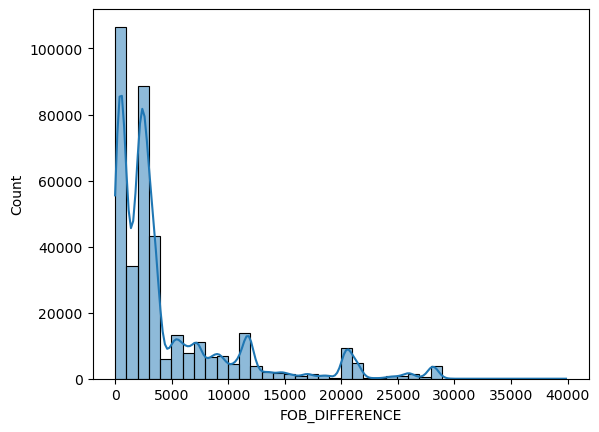

In [226]:
sns.histplot(combined_noNulls["FOB_DIFFERENCE"], bins=40, kde=True)

## **LEFT WING, RIGHT WING CALCULATIONS**

In this section, we will focusing on point number 3. Therefore, we will need to calculate two variables:
- `TOTAL_FUEL_RW`: Total Fuel Right Wing
- `TOTAL_FUEL_LW`: Total Fuel Left Wing

Perhaps we can assume that any anomalies that are present within the left wing and right wing fuel difference can be a good indicator of a fuel leak

In [227]:
# Total Fuel in Left and Right Wing
combined['TOTAL_FUEL_LW'] = (combined['VALUE_FUEL_QTY_LXT'] + combined['VALUE_FUEL_QTY_FT1'] + combined['VALUE_FUEL_QTY_FT2'])
combined['TOTAL_FUEL_RW'] = (combined['VALUE_FUEL_QTY_RXT'] + combined['VALUE_FUEL_QTY_FT3'] + combined['VALUE_FUEL_QTY_FT4'])

In [228]:
combined['LW_RW_DIFF'] = (combined['TOTAL_FUEL_LW'] - combined['TOTAL_FUEL_RW']).abs()

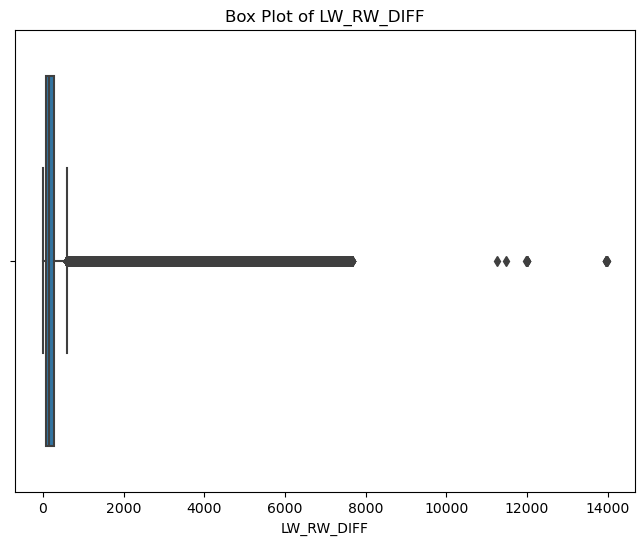

In [ ]:
plt.figure(figsize=(8,6))  
sns.boxplot(x=combined['LW_RW_DIFF'])
plt.title('Box Plot of LW_RW_DIFF')  
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LW_RW_DIFF', ylabel='Count'>

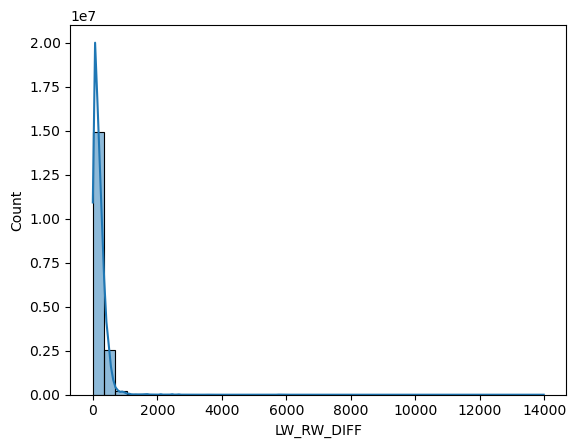

In [230]:
sns.histplot(combined["LW_RW_DIFF"], bins=40, kde=True)

#### ***COMPARISION WITH MSN02***

In [231]:
# Total Fuel in Left and Right Wing
msn02['TOTAL_FUEL_LW'] = (msn02['VALUE_FUEL_QTY_LXT'] + msn02['VALUE_FUEL_QTY_FT1'] + msn02['VALUE_FUEL_QTY_FT2'])
msn02['TOTAL_FUEL_RW'] = (msn02['VALUE_FUEL_QTY_RXT'] + msn02['VALUE_FUEL_QTY_FT3'] + msn02['VALUE_FUEL_QTY_FT4'])

In [232]:
msn02['LW_RW_DIFF'] = (msn02['TOTAL_FUEL_LW'] - msn02['TOTAL_FUEL_RW']).abs()

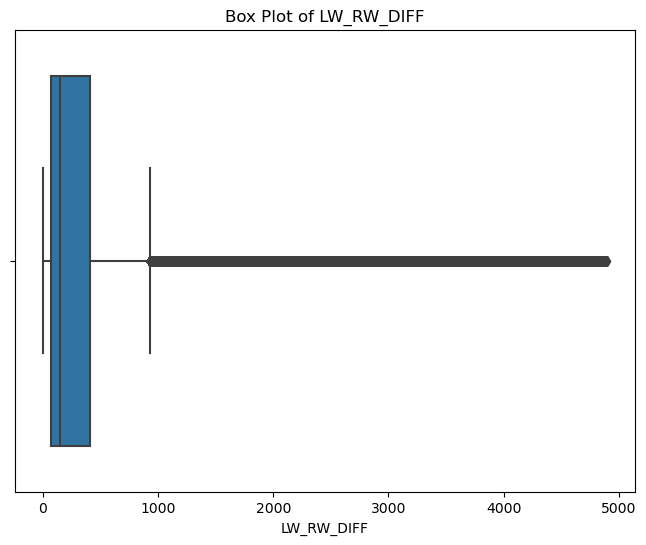

In [ ]:
plt.figure(figsize=(8,6)) 
sns.boxplot(x=msn02['LW_RW_DIFF'])
plt.title('Box Plot of LW_RW_DIFF')  
plt.show()

In [234]:
msn02['STATUS_FUEL_LEAK_DETECTED_VALID'].unique()

array([1., 0.])

In [235]:
msn02['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()


STATUS_FUEL_LEAK_DETECTED_VALID
1.0    383551
0.0        13
Name: count, dtype: int64

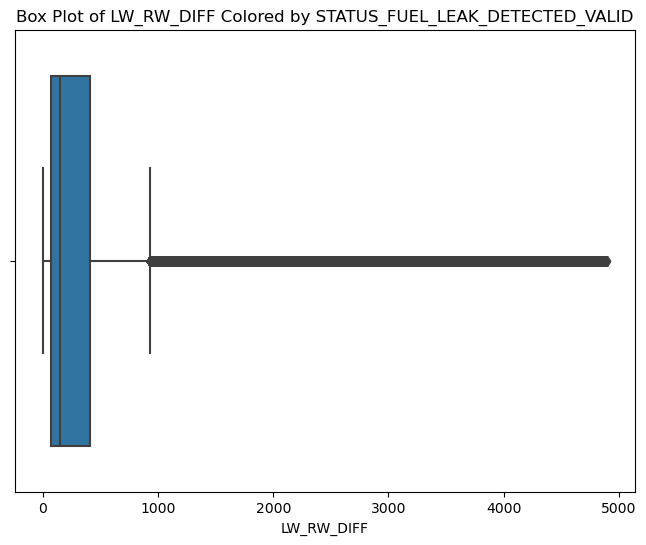

In [236]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=msn02['LW_RW_DIFF'], 
            hue=msn02['STATUS_FUEL_LEAK_DETECTED_VALID'])

plt.title('Box Plot of LW_RW_DIFF Colored by STATUS_FUEL_LEAK_DETECTED_VALID')
plt.xlabel('LW_RW_DIFF')
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LW_RW_DIFF', ylabel='Count'>

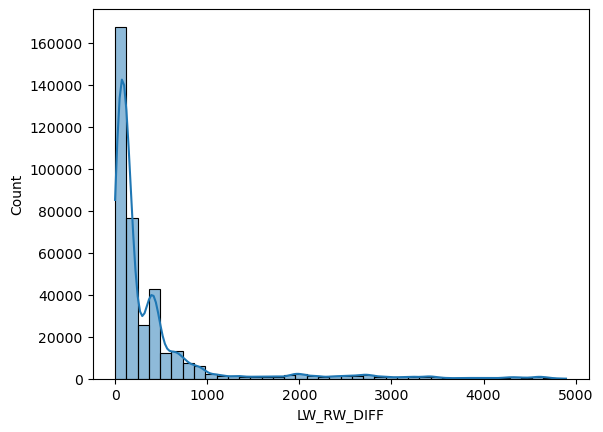

In [237]:
sns.histplot(msn02["LW_RW_DIFF"], bins=40, kde=True)

# **EDA**

In [238]:
# Total Fuel in Left and Right Wing
combined_noNulls['TOTAL_FUEL_LW'] = (combined_noNulls['VALUE_FUEL_QTY_LXT'] + combined_noNulls['VALUE_FUEL_QTY_FT1'] + combined_noNulls['VALUE_FUEL_QTY_FT2'])
combined_noNulls['TOTAL_FUEL_RW'] = (combined_noNulls['VALUE_FUEL_QTY_RXT'] + combined_noNulls['VALUE_FUEL_QTY_FT3'] + combined_noNulls['VALUE_FUEL_QTY_FT4'])

/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/2419187726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_noNulls['TOTAL_FUEL_LW'] = (combined_noNulls['VALUE_FUEL_QTY_LXT'] + combined_noNulls['VALUE_FUEL_QTY_FT1'] + combined_noNulls['VALUE_FUEL_QTY_FT2'])
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/2419187726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_noNulls['TOTAL_FUEL_RW'] = (combined_noNulls['VALUE_FUEL_QTY_RXT'] + combined_noNulls['V

In [239]:
combined_noNulls['LW_RW_DIFF'] = (combined_noNulls['TOTAL_FUEL_LW'] - combined_noNulls['TOTAL_FUEL_RW']).abs()

/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_78218/517964615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_noNulls['LW_RW_DIFF'] = (combined_noNulls['TOTAL_FUEL_LW'] - combined_noNulls['TOTAL_FUEL_RW']).abs()


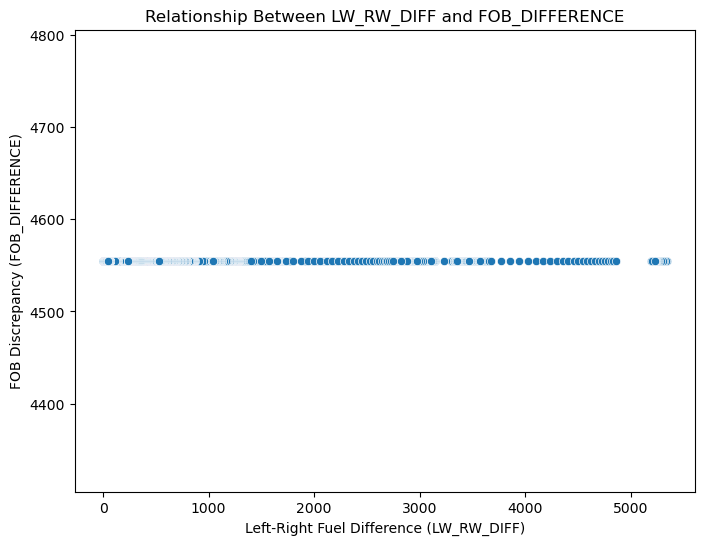

In [275]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=combined_noNulls["LW_RW_DIFF"], y=(combined_noNulls["FOB_DIFFERENCE"].mean()))
plt.xlabel("Left-Right Fuel Difference (LW_RW_DIFF)")
plt.ylabel("FOB Discrepancy (FOB_DIFFERENCE)")
plt.title("Relationship Between LW_RW_DIFF and FOB_DIFFERENCE")
plt.show()


# Check if we are taking the average

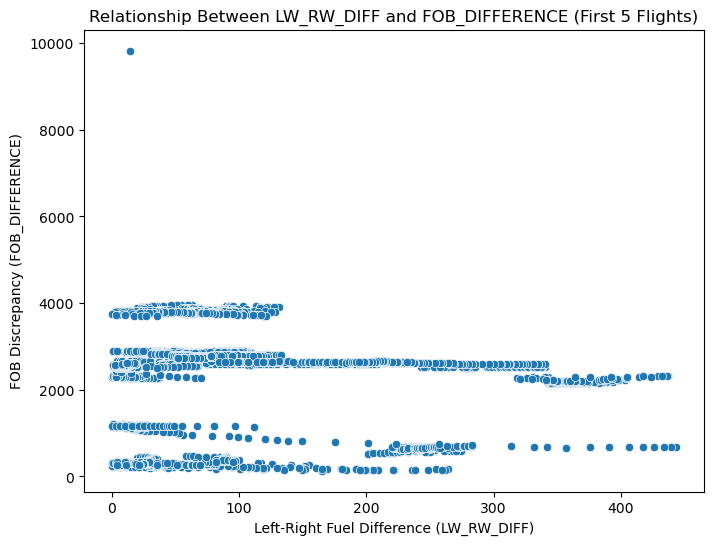

In [247]:
# Select the first 5 unique flights
sample_flights = combined_noNulls["Flight"].unique()[:10]

# Filter the data to include only the selected flights
subset = combined_noNulls[combined_noNulls["Flight"].isin(sample_flights)]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=subset["LW_RW_DIFF"], y=subset["FOB_DIFFERENCE"])
plt.xlabel("Left-Right Fuel Difference (LW_RW_DIFF)")
plt.ylabel("FOB Discrepancy (FOB_DIFFERENCE)")
plt.title("Relationship Between LW_RW_DIFF and FOB_DIFFERENCE (First 5 Flights)")
plt.show()


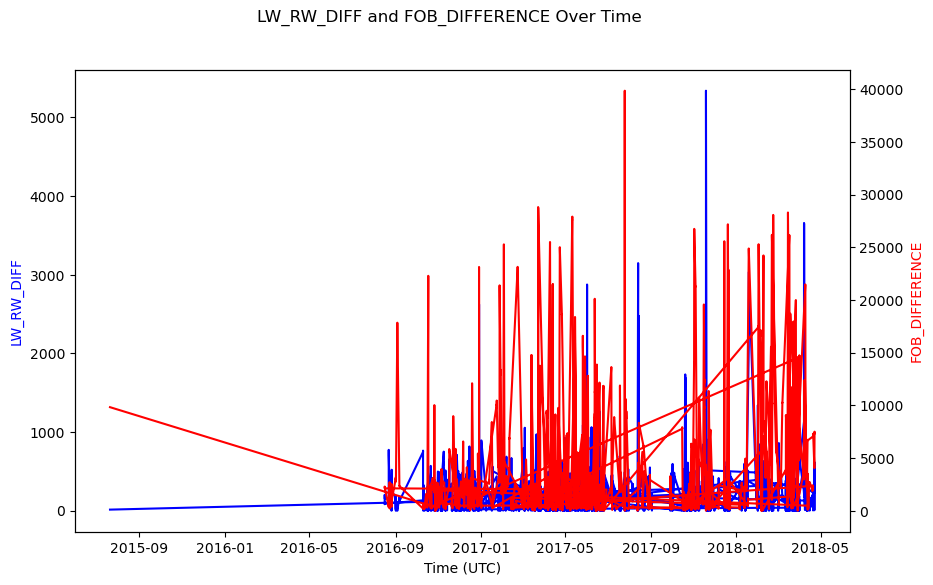

In [241]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Time (UTC)")
ax1.set_ylabel("LW_RW_DIFF", color="blue")
ax1.plot(combined_noNulls.index, combined_noNulls["LW_RW_DIFF"], color="blue", label="LW_RW_DIFF")

ax2 = ax1.twinx()
ax2.set_ylabel("FOB_DIFFERENCE", color="red")
ax2.plot(combined_noNulls.index, combined_noNulls["FOB_DIFFERENCE"], color="red", label="FOB_DIFFERENCE")

fig.suptitle("LW_RW_DIFF and FOB_DIFFERENCE Over Time")
plt.show()


### ***COMPARISON WITH MSN02***

In [248]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383564 entries, 2011-03-09 12:44:19 to 2011-03-10 17:17:01
Data columns (total 116 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   383564 non-null  object 
 1    Flight                                383564 non-null  object 
 2    ENGINE_RUNNING_1                      383564 non-null  bool   
 3    ENGINE_RUNNING_2                      383564 non-null  bool   
 4    ENGINE_RUNNING_3                      383564 non-null  bool   
 5    ENGINE_RUNNING_4                      383564 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    383564 non-null  float64
 7    FUEL_FLOW_1                           383564 non-null  float64
 8    FUEL_FLOW_2                           383564 non-null  float64
 9    FUEL_FLOW_3                           383564 non-null  float64
 10   FUEL_FLOW_4         

#### LEFT VS RIGHT WING CALCULATIONS

In [249]:
msn02

,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,FUEL_FLOW_3,...,STATUS_OVERFLOW_LST,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST,TOTAL_FUEL_USED,TOTAL_FUEL_QUANTITY,FUEL_BALANCE_DIFF,TOTAL_FUEL_LW,TOTAL_FUEL_RW,LW_RW_DIFF
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2011-03-09 12:44:19,A400M-0002,V0136,True,True,True,True,8.0,1905.0290,1903.9430,1901.6260,...,0.0,0.0,90.40136,0.0,908.3574,26048.0,-910.3574,12917.0,13131.0,214.0
2011-03-09 12:44:20,A400M-0002,V0136,True,True,True,True,8.0,1905.8770,1905.1420,1895.0700,...,0.0,0.0,89.19634,0.0,910.3853,26043.0,-911.3853,12915.0,13128.0,213.0
2011-03-09 12:44:21,A400M-0002,V0136,True,True,True,True,8.0,1913.0050,1904.2870,1896.6740,...,0.0,0.0,88.02405,0.0,912.5397,26040.0,-914.5397,12917.0,13123.0,206.0
2011-03-09 12:44:22,A400M-0002,V0136,True,True,True,True,8.0,1910.3440,1905.9860,1898.5860,...,0.0,0.0,86.80078,0.0,914.5687,26034.0,-916.5687,12914.0,13120.0,206.0
2011-03-09 12:44:23,A400M-0002,V0136,True,True,True,True,8.0,1906.6650,1904.0310,1897.2570,...,0.0,0.0,85.58003,0.0,916.7865,26031.0,-918.7865,12913.0,13118.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-10 17:16:57,A400M-0002,V0137,True,True,True,True,8.0,918.8004,909.0864,905.9593,...,0.0,0.0,42.61719,0.0,20650.5410,7674.0,-20653.5410,4095.0,3579.0,516.0
2011-03-10 17:16:58,A400M-0002,V0137,True,True,True,True,8.0,1075.5530,1087.5100,1066.0480,...,0.0,0.0,42.66656,0.0,20651.6730,7673.0,-20654.6730,4096.0,3577.0,519.0
2011-03-10 17:16:59,A400M-0002,V0137,True,True,True,True,8.0,1046.2430,1106.4250,1004.3510,...,0.0,0.0,42.60743,0.0,20652.9000,7673.0,-20656.9000,4096.0,3577.0,519.0


In [250]:
# Start amount of fuel on board
msn02['START_FOB'] = msn02.groupby('Flight')['VALUE_FOB'].transform('first')

# Find the total amount of fuel used
msn02['TOTAL_FUEL_USED'] = msn02['FUEL_USED_1'] + msn02['FUEL_USED_2'] + msn02['FUEL_USED_3'] + msn02['FUEL_USED_4']

# Find expected amount of fuel on board (Starting amount of fuel - total fuel used)
msn02['EXPECTED_FOB'] = msn02['START_FOB'] - msn02['TOTAL_FUEL_USED']

# Finding the discrepancy of what is on board and what is expected to be on board
msn02["FOB_DIFFERENCE"] = (msn02['VALUE_FOB'] - msn02['EXPECTED_FOB']).abs()

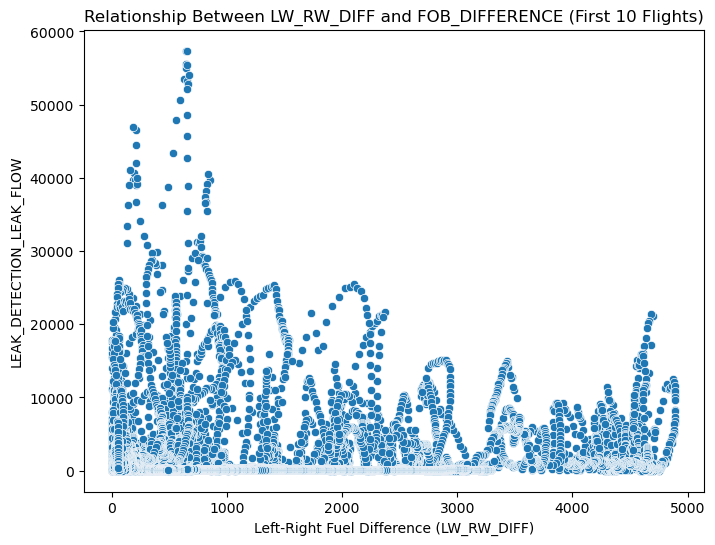

In [260]:
# Select the first 5 unique flights
sample_flights_msn02 = msn02["Flight"].unique()[:10]

# Filter the data to include only the selected flights
subset_msn02 = msn02[msn02["Flight"].isin(sample_flights_msn02)]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=subset_msn02["LW_RW_DIFF"], y=subset_msn02["LEAK_DETECTION_LEAK_FLOW"].abs())
plt.xlabel("Left-Right Fuel Difference (LW_RW_DIFF)")
plt.ylabel("LEAK_DETECTION_LEAK_FLOW")
plt.title("Relationship Between LW_RW_DIFF and FOB_DIFFERENCE (First 10 Flights)")
plt.show()

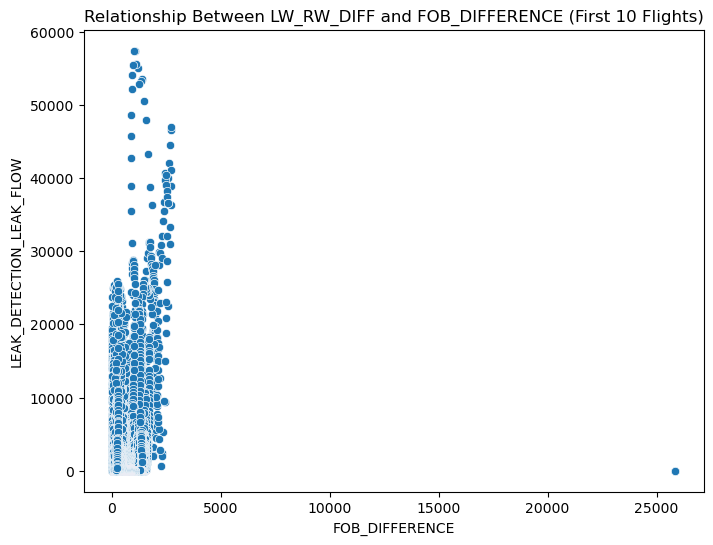

In [261]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=subset_msn02["FOB_DIFFERENCE"], y=subset_msn02["LEAK_DETECTION_LEAK_FLOW"].abs())
plt.xlabel("FOB_DIFFERENCE")
plt.ylabel("LEAK_DETECTION_LEAK_FLOW")
plt.title("Relationship Between LW_RW_DIFF and FOB_DIFFERENCE (First 10 Flights)")
plt.show()

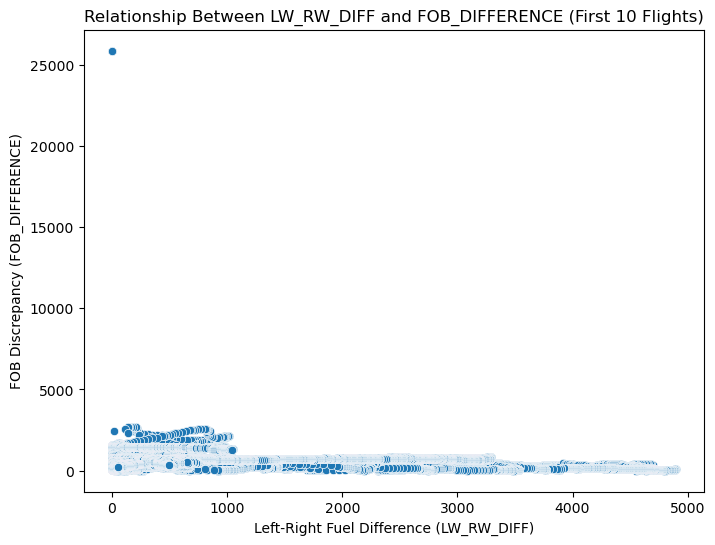

In [269]:
# Select the first 5 unique flights
sample_flights_msn02 = msn02["Flight"].unique()[:10]

# Filter the data to include only the selected flights
subset_msn02 = msn02[msn02["Flight"].isin(sample_flights_msn02)]

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=subset_msn02["LW_RW_DIFF"], y=subset_msn02["FOB_DIFFERENCE"])
plt.xlabel("Left-Right Fuel Difference (LW_RW_DIFF)")
plt.ylabel("FOB Discrepancy (FOB_DIFFERENCE)")
plt.title("Relationship Between LW_RW_DIFF and FOB_DIFFERENCE (First 10 Flights)")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


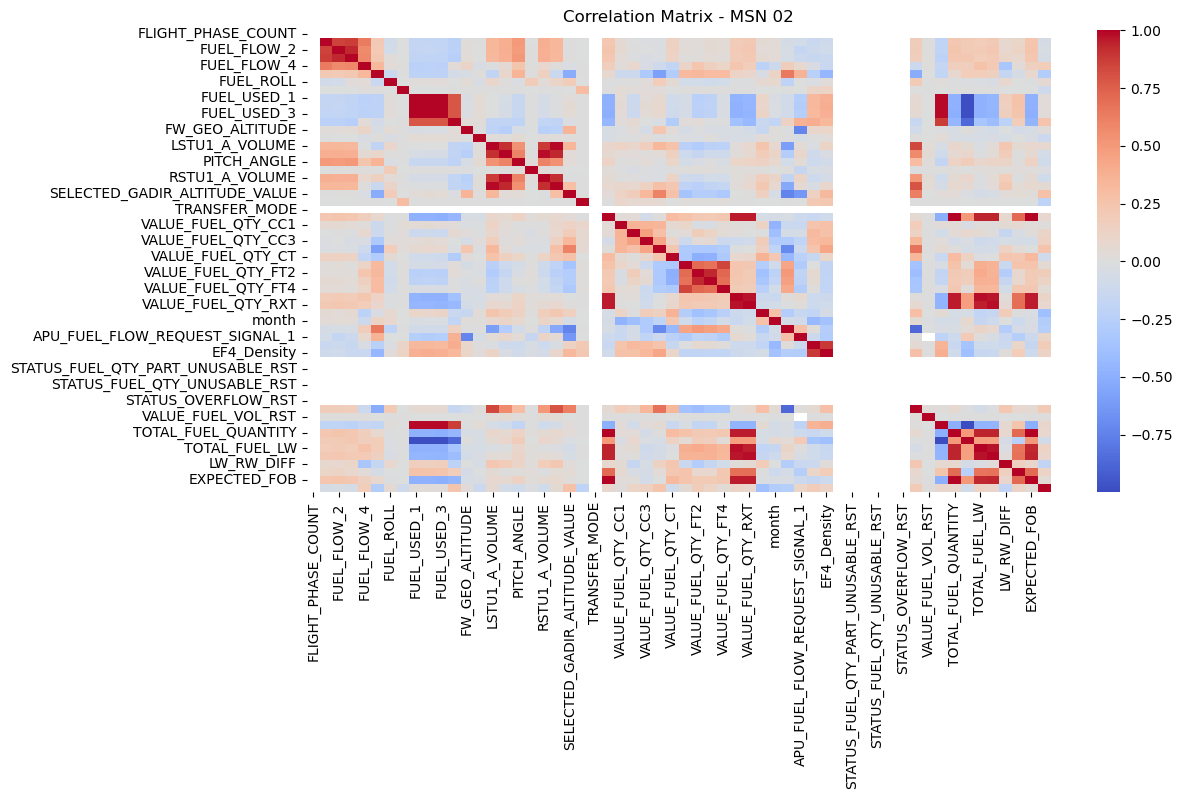

In [277]:
mns02_numeric = msn02.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix_02 = msn02[mns02_numeric].corr()

# Plot heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_02, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - MSN 02")
plt.show()

In [278]:
combined_noNulls.columns

Index(['FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 'FW_GEO_ALTITUDE',
       'VALUE_FOB', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1',
       'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
       'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT', 'FLIGHT_PHASE_COUNT',
       'FUEL_USED_1', 'Flight', 'MSN', 'TOTAL_FUEL_USED',
       'TOTAL_FUEL_QUANTITY', 'FUEL_BALANCE_DIFF', 'START_FOB', 'EXPECTED_FOB',
       'FOB_DIFFERENCE', 'TOTAL_FUEL_LW', 'TOTAL_FUEL_RW', 'LW_RW_DIFF'],
      dtype='object')

In [284]:
filtered_msn02 = msn02.loc[:, combined_noNulls.columns.tolist() + ['LEAK_DETECTION_LEAK_FLOW', 'STATUS_FUEL_LEAK_DETECTED_VALID']]


In [285]:
filtered_msn02.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383564 entries, 2011-03-09 12:44:19 to 2011-03-10 17:17:01
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FUEL_USED_2                      383564 non-null  float64
 1   FUEL_USED_3                      383564 non-null  float64
 2   FUEL_USED_4                      383564 non-null  float64
 3   FW_GEO_ALTITUDE                  383564 non-null  float64
 4   VALUE_FOB                        383564 non-null  float64
 5   VALUE_FUEL_QTY_CT                383564 non-null  float64
 6   VALUE_FUEL_QTY_FT1               383564 non-null  float64
 7   VALUE_FUEL_QTY_FT2               383564 non-null  float64
 8   VALUE_FUEL_QTY_FT3               383564 non-null  float64
 9   VALUE_FUEL_QTY_FT4               383564 non-null  float64
 10  VALUE_FUEL_QTY_LXT               383564 non-null  float64
 11  VALUE_FUEL_QTY_RXT             

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


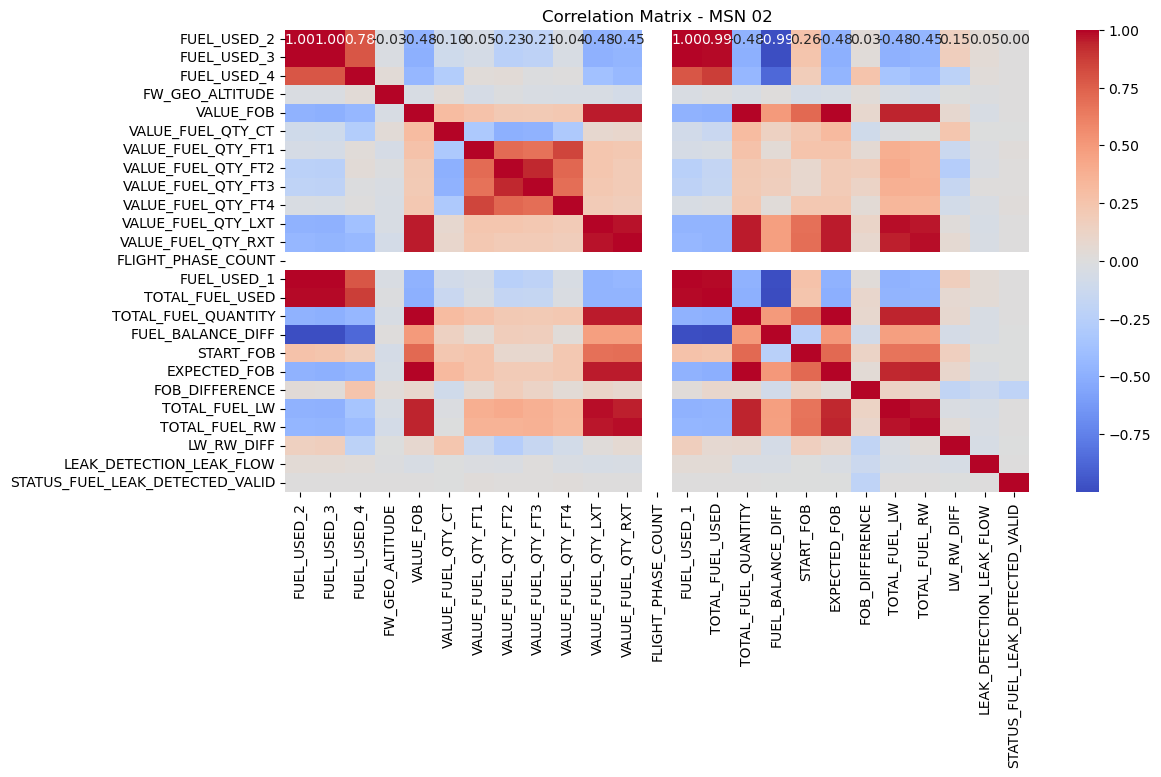

In [286]:
mns02_filtered_numeric = filtered_msn02.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
filtered_correlation_matrix_02 = filtered_msn02[mns02_filtered_numeric].corr()

# Plot heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_correlation_matrix_02, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - MSN 02")
plt.show()

In [ ]:
# FIND lagged fuel difference!